### Постановка задачи
Построить модель энергопотребления здания по часам. Погоду и характеристики здания пока не рассматривать.

Данные: http://video.ittensive.com/machine-learning/ashrae/train.0.0.csv.gz
Соревнование: https://www.kaggle.com/c/ashrae-energy-prediction/

© ITtensive, 2020

### Загрузка библиотек

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 16, 8

### Загрузка данных
Энергопотребление здания 0

In [2]:
ish_data = pd.read_csv("/home/al/PycharmProjects/examples_problem_solving_kaggl/mashin_learning_and_kaggle/jupiter_bilder/train.csv")
energy_0 = ish_data.loc[ish_data['building_id'] == 0]
print (energy_0.head())

      building_id  meter            timestamp  meter_reading
0               0      0  2016-01-01 00:00:00            0.0
2301            0      0  2016-01-01 01:00:00            0.0
4594            0      0  2016-01-01 02:00:00            0.0
6893            0      0  2016-01-01 03:00:00            0.0
9189            0      0  2016-01-01 04:00:00            0.0


### Обогащение данных
Добавим серию с часом суток для построения суточной модели потребления

In [11]:
energy_0["timestamp"] = pd.to_datetime(energy_0["timestamp"])
energy_0["hour"] = energy_0["timestamp"].dt.hour
print (energy_0.head())

      building_id  meter           timestamp  meter_reading  hour
0               0      0 2016-01-01 00:00:00            0.0     0
2301            0      0 2016-01-01 01:00:00            0.0     1
4594            0      0 2016-01-01 02:00:00            0.0     2
6893            0      0 2016-01-01 03:00:00            0.0     3
9189            0      0 2016-01-01 04:00:00            0.0     4


<ipython-input-11-cf85bde8971c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_0["timestamp"] = pd.to_datetime(energy_0["timestamp"])
<ipython-input-11-cf85bde8971c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_0["hour"] = energy_0["timestamp"].dt.hour


### Среднее потребление по часам
Выведем среднее и медиану потребления энергии по часам

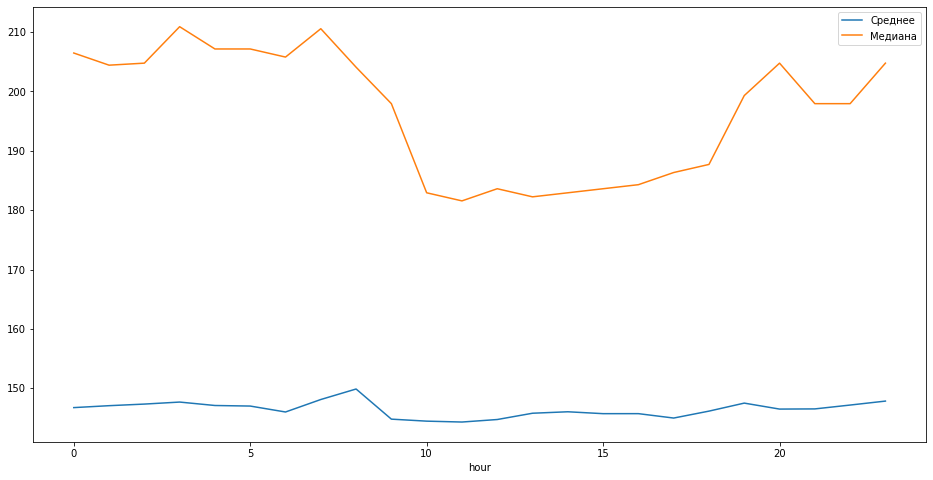

In [12]:
energy_0_hours = energy_0.groupby("hour")
energy_0_averages = pd.DataFrame(
    {"Среднее": energy_0_hours.mean()["meter_reading"],
     "Медиана": energy_0_hours.median()["meter_reading"]})
energy_0_averages.plot()
plt.show()

### Фильтруем метрику
Удаляем нулевые значения из статистики

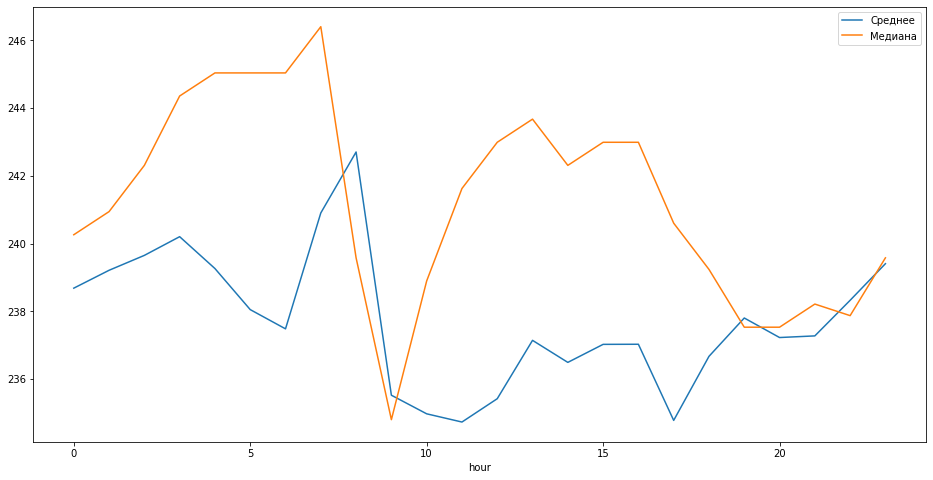

In [14]:
energy_0_hours_filtered = energy_0[energy_0["meter_reading"]>0].groupby("hour")
energy_0_averages_filtered = pd.DataFrame(
    {"Среднее": energy_0_hours_filtered.mean()["meter_reading"],
     "Медиана": energy_0_hours_filtered.median()["meter_reading"]})
energy_0_averages_filtered.plot()
plt.show()

### Интерполируем данные по часам
Построим модель внутрисуточного потребление энергии по зданию

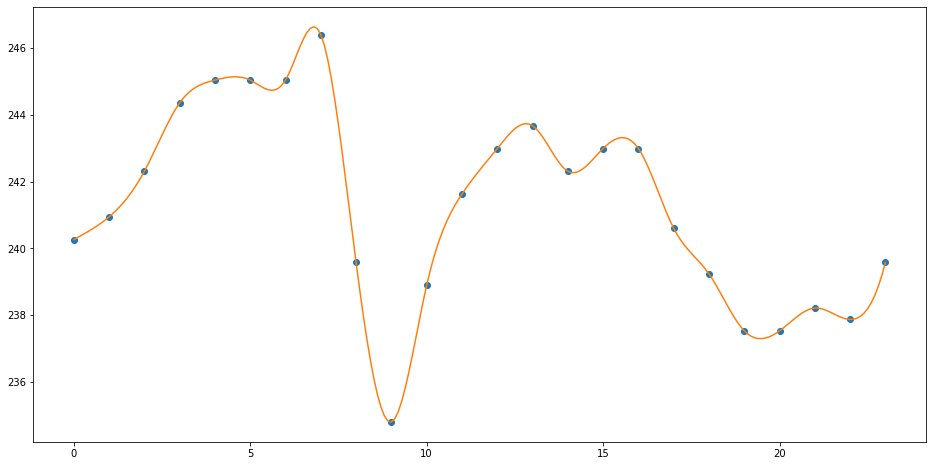

In [15]:
x = np.arange(0, 24)
y = interp1d(x, energy_0_hours_filtered.median()["meter_reading"], kind="cubic") # рассчитываем функцию интерполяции
# параметр kind может принимать следующие значения  -  ‘linear’, ‘nearest’, ‘nearest-up’, ‘zero’, ‘slinear’, ‘quadratic’, 
# ‘cubic’, ‘previous’, or ‘next’ их значения описаны в- 
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d

xn = np.arange(0, 23.1, 0.1) # создаем массив х с шагом 0,1
yn = y(xn) # рассчитываем массив у для распечатки.
plt.plot(x, energy_0_hours_filtered.median()["meter_reading"],
         'o', xn, yn, '-')
plt.show()